
<b><h4>Marketing Coupon Mobile Delivery Acceptance Analysis <b/><h4/>

<b>Context:<b/>   

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Proximity to the business is a factor on whether the coupon is delivered to the driver or not. The analysis is focusing on coupon acceptance based on various categories represented in the data set.

<b>Data:<b/>

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’. There are five different types of coupons -- less expensive restaurants (under 20), coffee houses, carry out & take away, bar, and more expensive restaurants (20 - $50).



<b>Data Description:<b/>

User attributes:
Gender: male, female
Age: below 21, 21 to 25, 26 to 30, etc.
Marital Status: single, married partner, unmarried partner, or widowed
Number of children: 0, 1, or more than 1
Education: high school, bachelors degree, associates degree, or graduate degree
Occupation: architecture & engineering, business & financial, etc.
Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she eats at a restaurant with average expense less than $20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

Contextual attributes:
Driving destination: home, work, or no urgent destination
Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
Weather: sunny, rainy, or snowy
Temperature: 30F, 55F, or 80F
Time: 10AM, 2PM, or 6PM
Passenger: alone, partner, kid(s), or friend(s)

Coupon attributes:
Time before it expires: 2 hours or one day

In [373]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [374]:
# Import data set
data = pd.read_csv('data/coupons.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [375]:
# Inspect Missing Data
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0] 
print(missing_data)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


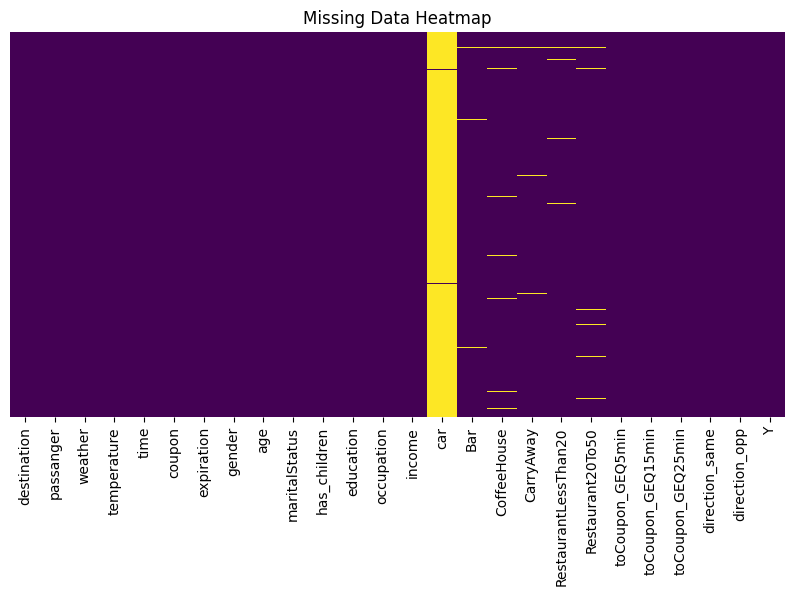

In [376]:
# Plot missing data heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [377]:
# Drop the 'car' column as it's missing 12576 out of 12684 entries
clean_data = data.drop(columns='car')

# For the remaining columns we can fill 'Unknown'
cols_to_replace_missing_data = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
clean_data[cols_to_replace_missing_data] = clean_data[cols_to_replace_missing_data].fillna('Unknown')

# Check the cleaned data
print(clean_data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


Percentage of users who accepted the coupon: 56.84%


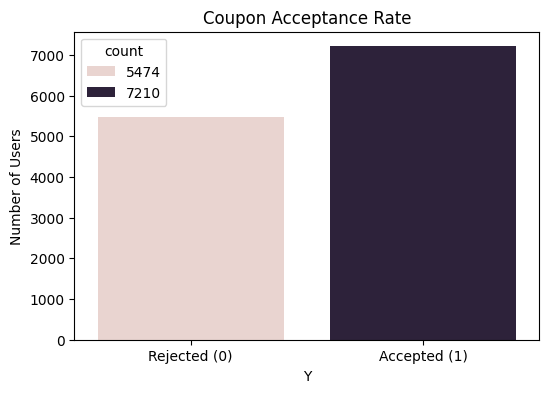

In [378]:
# Calculate the proportion of coupon acceptance
acceptance_rate = clean_data['Y'].mean() *100

acceptance_counts = clean_data['Y'].value_counts()

#create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, hue = acceptance_counts)

# Add labels and title
plt.xticks(ticks=[0, 1], labels=["Rejected (0)", "Accepted (1)"])
plt.ylabel("Number of Users")
plt.title("Coupon Acceptance Rate")

print(f"Percentage of users who accepted the coupon: {acceptance_rate:.2f}%")
plt.show()

# Acceptance rate analysis based on coupon type, education, annual income, marital status and occupation 

In [379]:
# Inspect values in the 'education' column
clean_data['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [380]:
# Inspect values in the 'income' column
clean_data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [381]:
# Inspect values in the 'maritalStatus' column
clean_data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [382]:
# Inspect values in the 'age' column
clean_data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [383]:
# Inspect values in the 'time' column
clean_data['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [384]:
# Rename Graduate degree column
clean_data['education'] = clean_data['education'].replace({
    'Graduate degree (Masters or Doctorate)': 'Masters/Doctorate'
})

# Rename values in maritalStatus column
clean_data['maritalStatus'] = clean_data['maritalStatus'].replace({
    'Married partner': 'Married',
    'Unmarried partner': 'Unmarried'
})

# Order values from highest to lowest education level
education_order = [
    'Masters/Doctorate',
    'Bachelors degree',
    'Associates degree',
    'Some college - no degree',
    'High School Graduate',
    'Some High School'
]

# Define the correct order for income levels
income_order = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
    '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'
]

# Define the correct order for marital status
marital_order = [
    'Unmarried', 'Single', 'Married', 'Divorced', 'Widowed'
]

# Define the correct order for age
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Define the correct order for time
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']

In [385]:
# Compute acceptance rates grouped by coupon type and other categories
education_acceptance = clean_data.groupby(['coupon', 'education'])['Y'].mean().unstack() * 100
income_acceptance = clean_data.groupby(['coupon', 'income'])['Y'].mean().unstack() * 100
marital_acceptance = clean_data.groupby(['coupon', 'maritalStatus'])['Y'].mean().unstack() * 100
occupation_acceptance = clean_data.groupby(['coupon', 'occupation'])['Y'].mean().unstack() * 100
age_acceptance = clean_data.groupby(['coupon', 'age'])['Y'].mean().unstack() * 100
time_acceptance = clean_data.groupby(['time', 'coupon'])['Y'].mean().unstack() * 100

# Reorder education levels based on actual categories in the dataset from highest to lowest
education_acceptance = education_acceptance.reindex(columns=education_order).T

# Reorder income levels from lowest to highest
income_acceptance = income_acceptance.reindex(columns=income_order)

# Reorder marital status
marital_acceptance = marital_acceptance.reindex(columns=marital_order)

# Reorder age
age_acceptance = age_acceptance.reindex(columns=age_order).T

# Ensure time values exist in the dataset before reordering
existing_time_order = [t for t in time_order if t in time_acceptance.index]

# Reorder time levels and fill NaN with 0
time_acceptance = time_acceptance.reindex(index=existing_time_order).fillna(0)


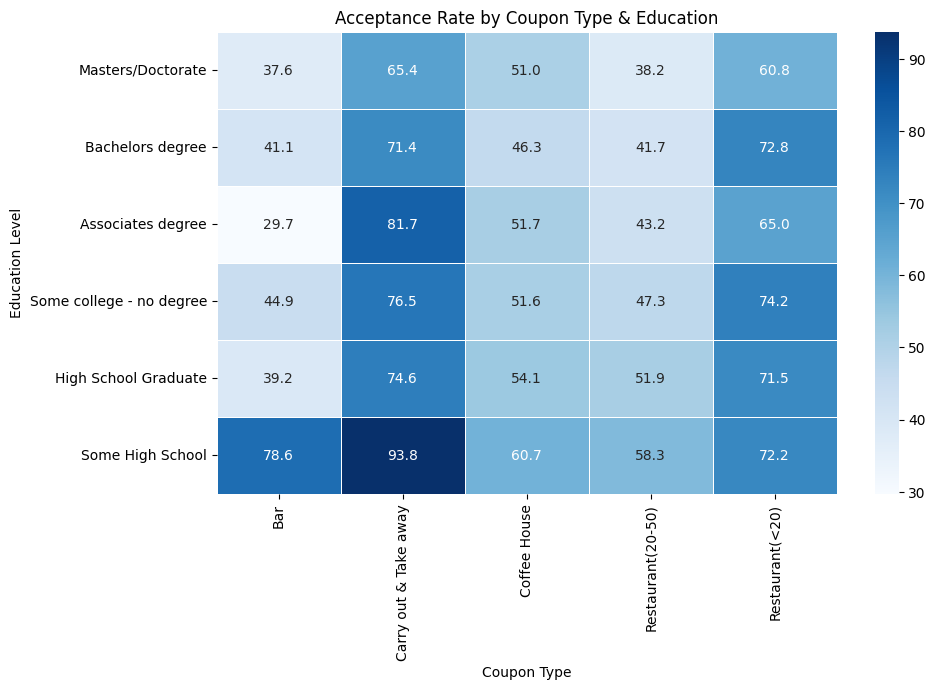

In [386]:
# Education Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(education_acceptance, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Coupon Type & Education")
plt.xlabel("Coupon Type")
plt.ylabel("Education Level")
plt.show()


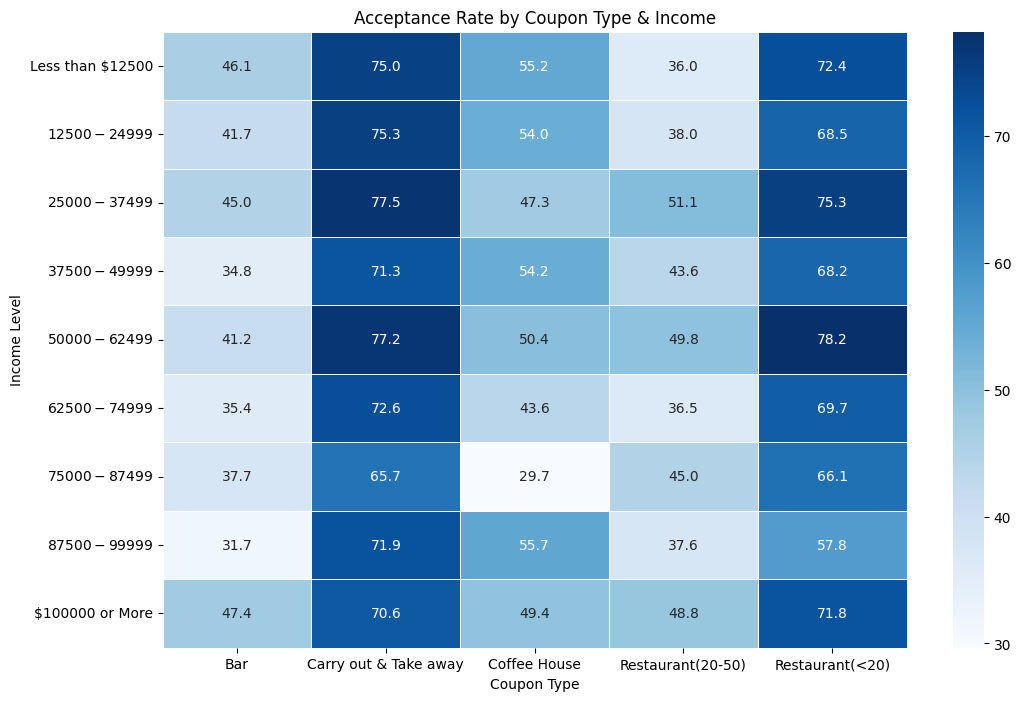

In [387]:
# Income Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(income_acceptance.T, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Coupon Type & Income")
plt.xlabel("Coupon Type")
plt.ylabel("Income Level")
plt.show()

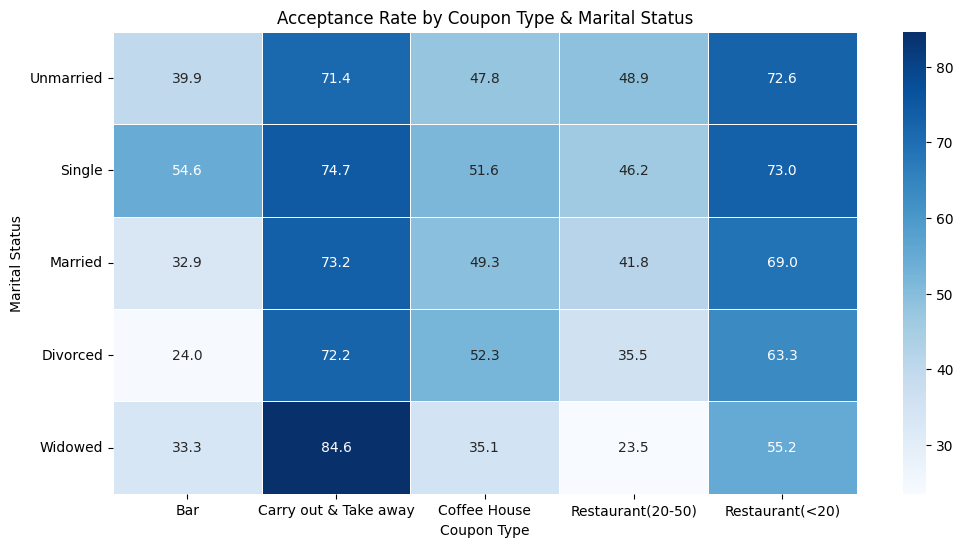

In [388]:
# Marital Status Heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(marital_acceptance.T, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Coupon Type & Marital Status")
plt.xlabel("Coupon Type")
plt.ylabel("Marital Status")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

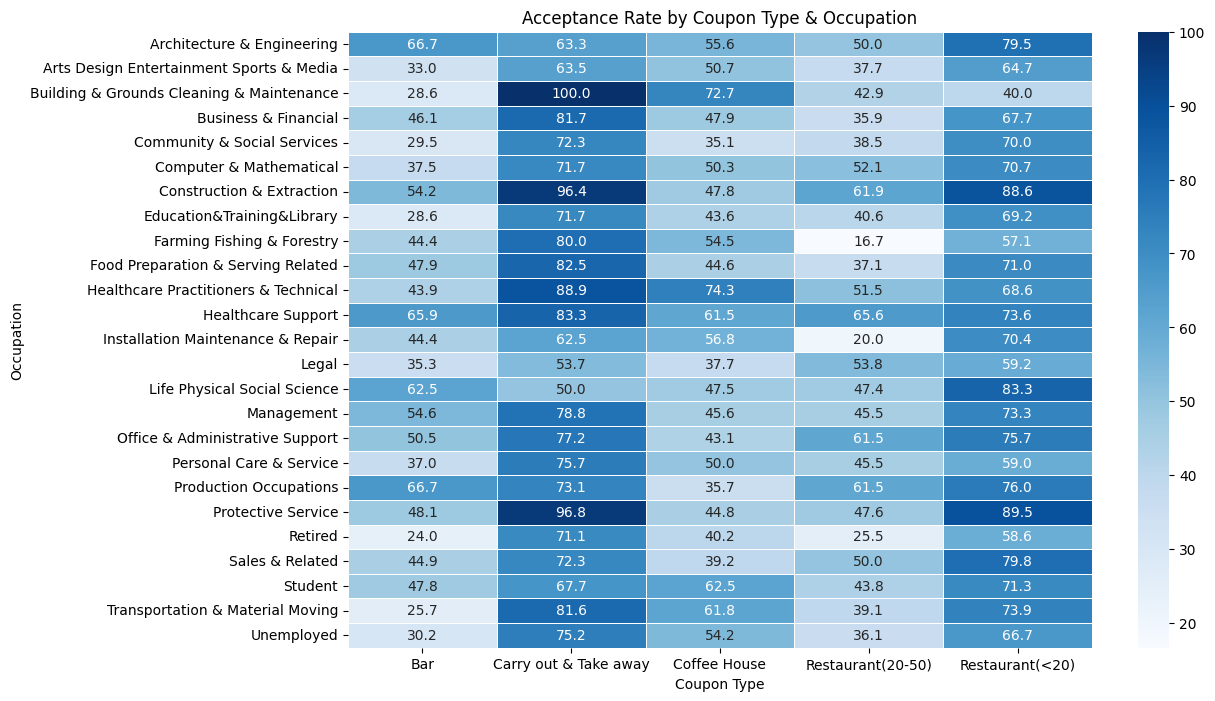

In [389]:
# Occupation Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(occupation_acceptance.T, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Coupon Type & Occupation")
plt.xlabel("Coupon Type")
plt.ylabel("Occupation")
plt.show()

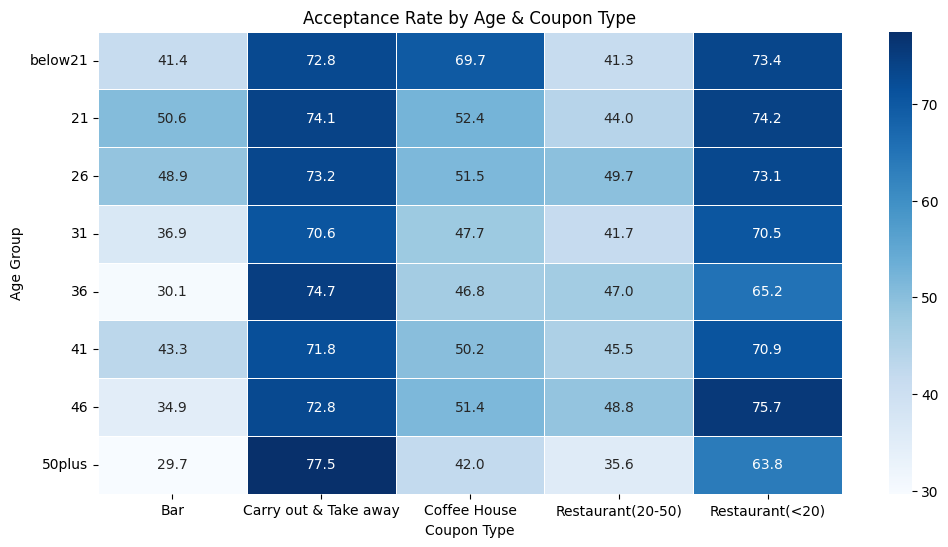

In [390]:
# Age Heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(age_acceptance, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Age & Coupon Type")
plt.ylabel("Age Group")
plt.xlabel("Coupon Type")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

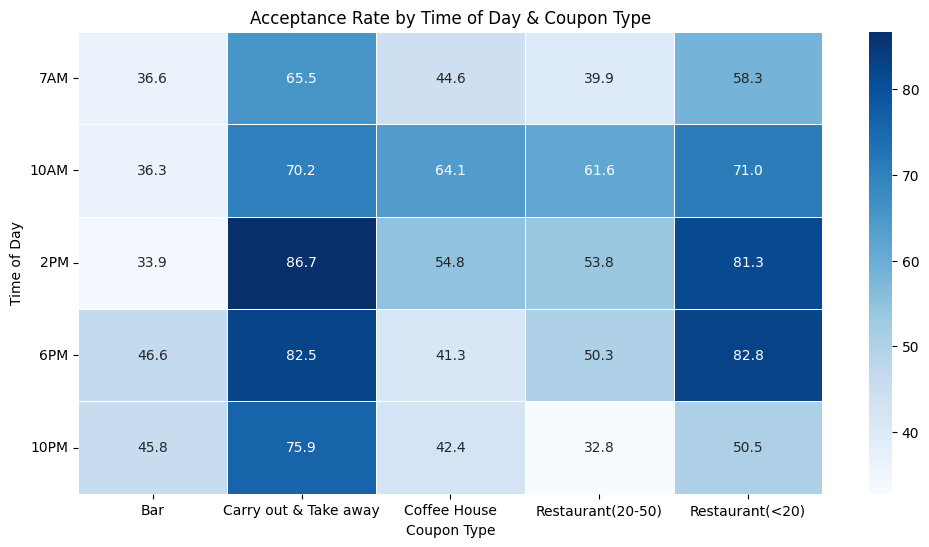

In [397]:
# Time Heatmap 
plt.figure(figsize=(12, 6))
ax = sns.heatmap(time_acceptance, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5)
plt.title("Acceptance Rate by Time of Day & Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Time of Day")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

<h3>Top Acceptance Rate Per A Coupon</h3>

In [445]:
# Original education_acceptance had education levels as index; we re-transpose it.
education_acceptance_fixed = education_acceptance.T

# Ensure Age and Time data use coupon as index.
age_acceptance_t = age_acceptance.T
time_acceptance_t = time_acceptance.T

# Build a dictionary of dimensions with coupon type as index.
dimensions = {
    'Education': education_acceptance_fixed,
    'Income': income_acceptance,
    'Marital': marital_acceptance,
    'Occupation': occupation_acceptance,
    'Age': age_acceptance_t,
    'Time': time_acceptance_t
}

# Build a dictionary that maps each coupon to its best category per dimension.
coupon_dict = {}
for dim, df in dimensions.items():
    for coupon in df.index:
        # Drop missing values.
        row = df.loc[coupon].dropna()
        if row.empty:
            continue  # Skip if no data.
        # Find the highest acceptance rate and its category.
        max_val = row.max()
        best_cat = row.idxmax()
        if coupon not in coupon_dict:
            coupon_dict[coupon] = {}
        coupon_dict[coupon][dim] = {'Category': best_cat, 'Acceptance Rate': max_val}

# Print the resulting dictionary in a readable format.
for coupon, dims in coupon_dict.items():
    print(f"Coupon: {coupon}")
    for dim, info in dims.items():
        print(f"  {dim}: Category = {info['Category']}, Acceptance Rate = {info['Acceptance Rate']:.2f}")
    print()

Coupon: Bar
  Education: Category = Some High School, Acceptance Rate = 78.57
  Income: Category = $100000 or More, Acceptance Rate = 47.42
  Marital: Category = Single, Acceptance Rate = 54.61
  Occupation: Category = Architecture & Engineering, Acceptance Rate = 66.67
  Age: Category = 21, Acceptance Rate = 50.60
  Time: Category = 6PM, Acceptance Rate = 46.64

Coupon: Carry out & Take away
  Education: Category = Some High School, Acceptance Rate = 93.75
  Income: Category = $25000 - $37499, Acceptance Rate = 77.49
  Marital: Category = Widowed, Acceptance Rate = 84.62
  Occupation: Category = Building & Grounds Cleaning & Maintenance, Acceptance Rate = 100.00
  Age: Category = 50plus, Acceptance Rate = 77.46
  Time: Category = 2PM, Acceptance Rate = 86.70

Coupon: Coffee House
  Education: Category = Some High School, Acceptance Rate = 60.71
  Income: Category = $87500 - $99999, Acceptance Rate = 55.72
  Marital: Category = Divorced, Acceptance Rate = 52.32
  Occupation: Category =

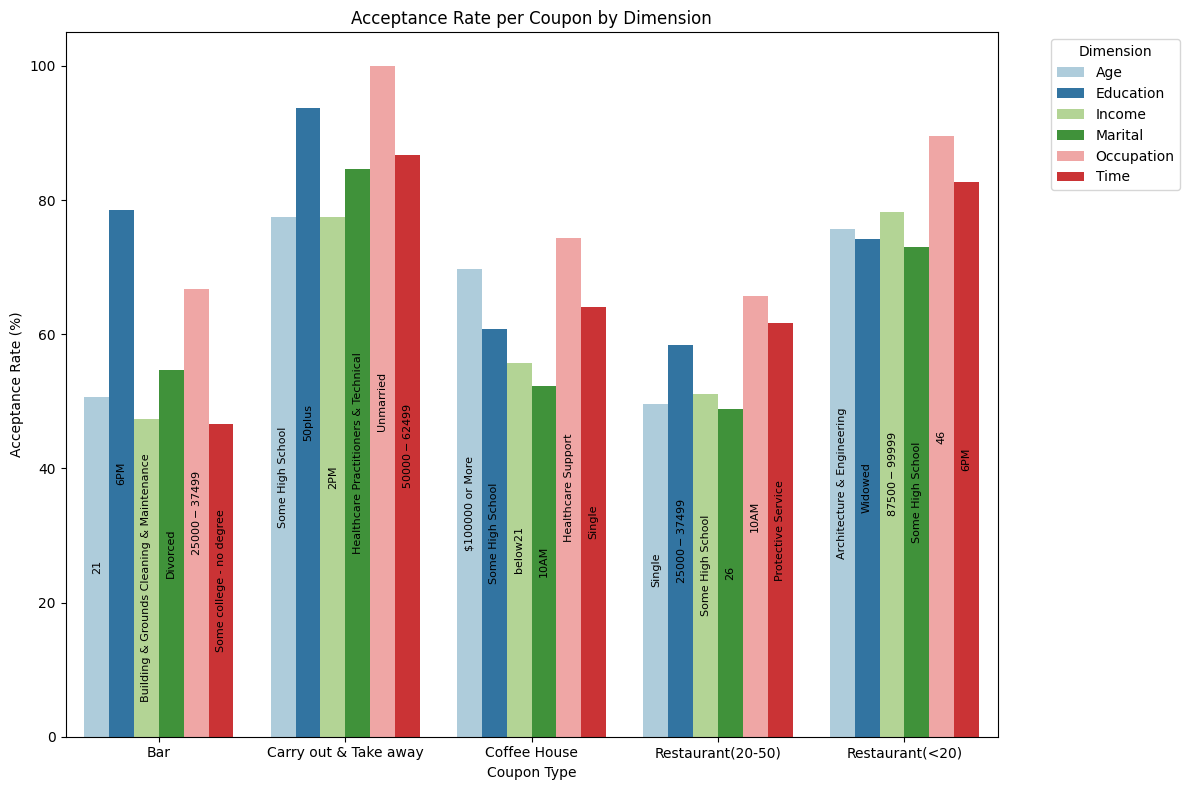

In [446]:
# Use Paired palette with 6 colors.
custom_palette = sns.color_palette("Paired", 6)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_coupon, x='Coupon', y='AcceptanceRate', hue='Dimension',
                 dodge=True, palette=custom_palette)

# Annotate each bar inside: center vertically in the bar.
for patch, (_, row) in zip(ax.patches, df_coupon.iterrows()):
    x_center = patch.get_x() + patch.get_width() / 2
    height = patch.get_height()
    ax.text(x_center, height/2, row['Category'],
            ha='center', va='center', fontsize=8, rotation=90, color='black', fontweight='light')

plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate (%)")
plt.title("Acceptance Rate per Coupon by Dimension")
plt.legend(title="Dimension", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3>Amazon Coupon Targeting Analysis</h3>

This analysis presents data-driven insights to determine the ideal customer segments for coupon distribution. We evaluated six key dimensions—Education, Income, Marital Status, Occupation, Age, and Delivery Time, to guide targeted coupon strategies.


<b>Approach:</b>

We examined acceptance rate heatmaps for each coupon type across the six dimensions. For each coupon, the highest acceptance rate category was selected per dimension. This method ensured that our recommendations reflect the segments most likely to engage with the coupon offer.


<b>Ideal Customer Profiles by Coupon Type:</b>

<b>Bar Coupon:</b>
The highest acceptance criteria describes the customers who have Some High School education (78.57%), are Single (54.61%), around 21 years of age (50.60%), and work in Architecture & Engineering field (66.67%) with income abouve $100k (47.42%). Their coupons should be delivered at 6PM.

<b>Carry out & Take away Coupon:</b>
Ideal customers show Some High School education (93.75%), are Widowed (84.62%), and work in Building & Grounds Cleaning & Maintenance profession (100.00%). Targeting is reinforced by an income range of $25,000–$37,499 (77.49%), and age of 50plus (77.46%). The coupon should be delivered around 2PM.

<b>Coffee House Coupon:</b>
The optimal segment includes customers with Some High School education (60.71%), who are Divorced (52.32%), are Healthcare Practitioners & Technical professionals (74.32%) with income of $87,500–$99,999 (55.72%) or age below 21 (69.68%). Coupons should be delivered at 10AM.

<b>Restaurant(20-50) Coupon:</b>
The best target is customers with Some High School education (58.33%), who are Unmarried (48.91%), and work in Healthcare Support (65.62%). Coupons are best delivered at 10AM, with additional factors including income of $25,000–$37,499 (51.10%) and age of 26 (49.66%).

<b>Restaurant(<20) Coupon:</b>
The data indicates that ideal customers have Some college with no degree (74.22%), are Single (72.99%), and work in Protective Service (89.47%). Their coupon should be delivered at 6PM, complemented by income levels of $50,000–$62,499 (78.25%) and age of 46 (75.68%).

